In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4681 - accuracy: 0.8282 - precision_5: 0.8786 - recall_5: 0.7821 - val_loss: 0.3549 - val_accuracy: 0.8690 - val_precision_5: 0.8920 - val_recall_5: 0.8460
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3053 - accuracy: 0.8879 - precision_5: 0.9075 - recall_5: 0.8702 - val_loss: 0.3089 - val_accuracy: 0.8873 - val_precision_5: 0.9128 - val_recall_5: 0.8630
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2612 - accuracy: 0.9025 - precision_5: 0.9182 - recall_5: 0.8892 - val_loss: 0.2752 - val_accuracy: 0.9030 - val_precision_5: 0.9164 - val_recall_5: 0.8899
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2312 - accuracy: 0.9139 - precision_5: 0.9272 - recall_5: 0.9023 - val_loss: 0.2614 - val_accuracy: 0.9056 - val_precision_5: 0.9214 - val_recall_5: 0.8926
Epoch 5/10
1875/1875 [==============================] - 

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2923 - accuracy: 0.9094 - precision_5: 0.9144 - recall_5: 0.9065


[0.29228103160858154,
 0.9093999862670898,
 0.9143635034561157,
 0.906499981880188]

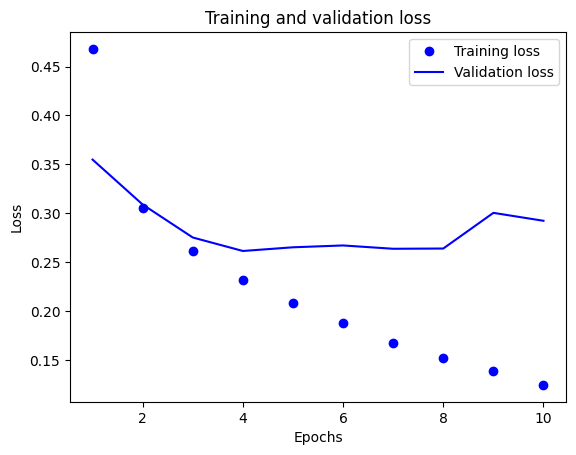

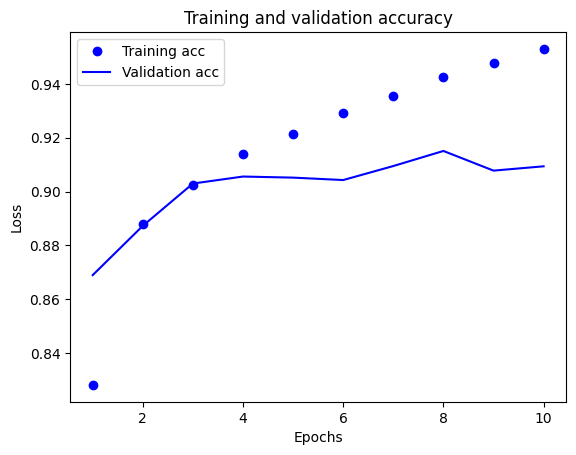

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()